In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Proj

In [15]:
pontos = {
    'p1': None,
    'p2': None,
    'p3': None,
    'p4': None,
    'p5': None,
    'p6': None
}
myProj = Proj("+proj=utm +zone=23K, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
lista_pontos = 'p1 p2 p3 p4 p5 p6'.split(' ')

In [19]:
for i in lista_pontos:
    
    pontos[i] = pd.read_csv(f'./csv/%s.csv'%i, sep=';')
    pontos[i].lon, pontos[i].lat = myProj(np.array(pontos[i].lon), np.array(pontos[i].lat))
    
    pontos[i].columns = 'timestamp utmx utmy'.split(' ')
    

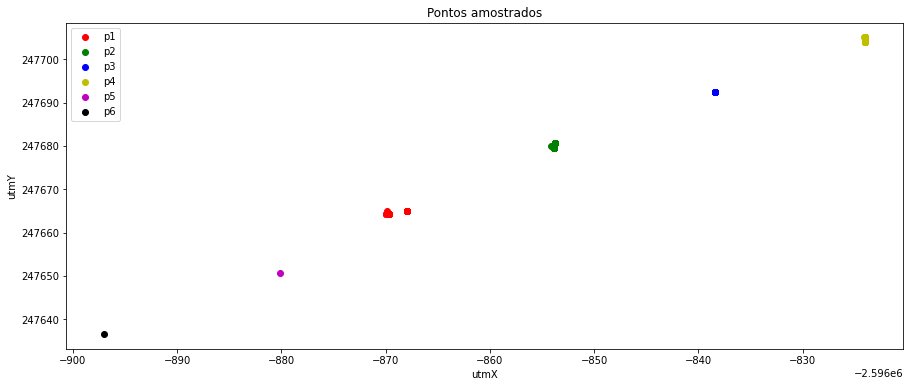

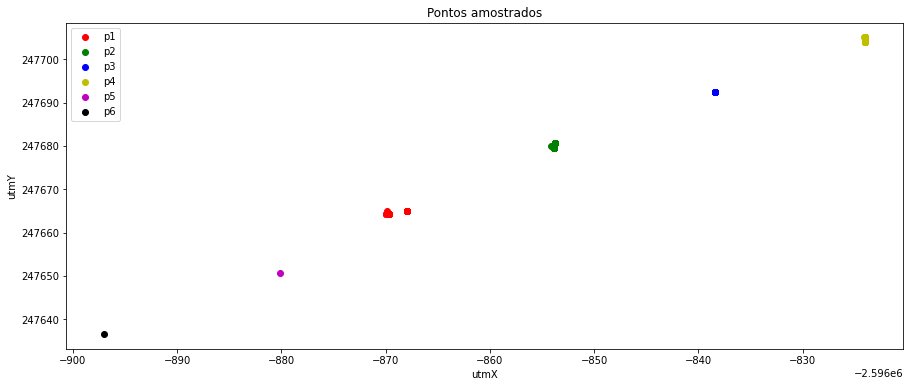

In [23]:
colors = 'r g b y m k'.split(' ')

plt.figure(figsize=(15, 6))

for c, p in zip(colors, lista_pontos):
    
    plt.scatter(pontos[p].utmx, pontos[p].utmy, color=c, label=p)

plt.title("Pontos amostrados")
plt.xlabel('utmX')
plt.ylabel('utmY')
plt.legend()
plt.show()

In [24]:
p1 = np.array([pontos['p1'].utmx.mean(), pontos['p1'].utmy.mean() ])
p2 = np.array([pontos['p2'].utmx.mean(), pontos['p2'].utmy.mean() ])
p3 = np.array([pontos['p3'].utmx.mean(), pontos['p3'].utmy.mean() ])
p4 = np.array([pontos['p4'].utmx.mean(), pontos['p4'].utmy.mean() ])
p5 = np.array([pontos['p5'].utmx.mean(), pontos['p5'].utmy.mean() ])
p6 = np.array([pontos['p6'].utmx.mean(), pontos['p6'].utmy.mean() ])

In [25]:
std_p1 = np.array([pontos['p1'].utmx.std(), pontos['p1'].utmy.std() ])*3
std_p2 = np.array([pontos['p2'].utmx.std(), pontos['p2'].utmy.std() ])*3
std_p3 = np.array([pontos['p3'].utmx.std(), pontos['p3'].utmy.std() ])*3
std_p4 = np.array([pontos['p4'].utmx.std(), pontos['p4'].utmy.std() ])*3
std_p5 = np.array([pontos['p5'].utmx.std(), pontos['p5'].utmy.std() ])*3
std_p6 = np.array([pontos['p6'].utmx.std(), pontos['p6'].utmy.std() ])*3

In [26]:
pontos = [p1, p2, p3, p4, p5, p6]
std_p = [std_p1, std_p2, std_p3, std_p4, std_p5, std_p6]

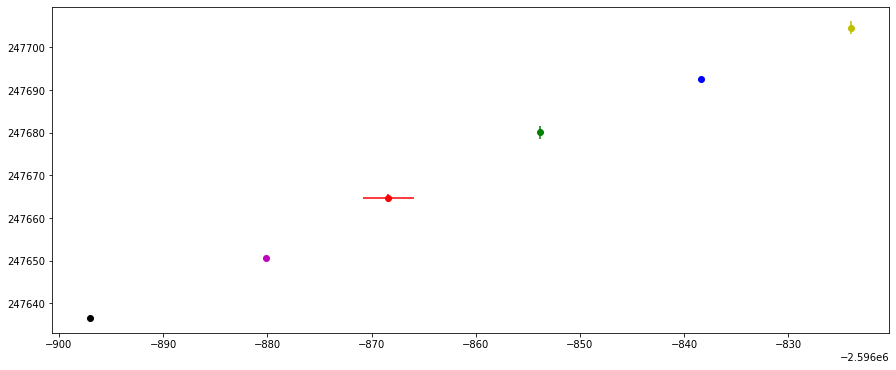

In [27]:
plt.figure(figsize=(15, 6))

for c, p, e in zip(colors, pontos, std_p):

        plt.scatter(p[0], p[1], color=c, label='label')
        plt.errorbar(p[0], p[1], xerr=e[0], yerr=e[1], color=c, linestyle="None")


In [52]:
# Calculo de distancias
a = p6 - p5
b = p5 - p1
c = p1 - p2
d = p2 - p3
e = p3 - p4
dist = []

In [53]:
for i , label in zip([a, b, c, d, e], ['a', 'b', 'c', 'd', 'e']):
    
    dist.append(np.linalg.norm(i))
    print("Distancia vetor %s: %f" % (label.upper(), np.linalg.norm(i)))

Distancia vetor A: 21.930524
Distancia vetor B: 18.393244
Distancia vetor C: 21.195464
Distancia vetor D: 19.750036
Distancia vetor E: 18.783451


In [54]:
dist

[21.93052389684179,
 18.393243532489876,
 21.195464248884768,
 19.7500361341491,
 18.78345084790724]

In [31]:
pts = [p1, p2, p3, p4, p5, p6]

In [33]:
a = np.zeros((6, 2))

In [34]:
for n, p in enumerate(pts):
    print(n,p)

0 [-2596868.3791779    247664.75038076]
1 [-2596853.80961179   247680.14438765]
2 [-2596838.41116905   247692.51175958]
3 [-2596824.0221287    247704.58543109]
4 [-2596880.13060263   247650.60063079]
5 [-2596896.99292165   247636.5788593 ]


In [35]:
for n, p in enumerate(pts):
    a[n,:] = p

In [36]:
a

array([[-2596868.3791779 ,   247664.75038076],
       [-2596853.80961179,   247680.14438765],
       [-2596838.41116905,   247692.51175958],
       [-2596824.0221287 ,   247704.58543109],
       [-2596880.13060263,   247650.60063079],
       [-2596896.99292165,   247636.5788593 ]])

In [44]:
pts_medios = pd.DataFrame()

In [45]:
pts_medios['pontos'] = 'p1 p2 p3 p4 p5 p6'.split(' ')

In [47]:
pts_medios['utmx'] = a[:,0]
pts_medios['utmy'] = a[:,1]

In [48]:
pts_medios

,pontos,utmx,utmy
0,p1,-2.596868e+06,247664.750381
1,p2,-2.596854e+06,247680.144388
2,p3,-2.596838e+06,247692.511760
3,p4,-2.596824e+06,247704.585431
4,p5,-2.596880e+06,247650.600631
5,p6,-2.596897e+06,247636.578859


In [66]:
distancias = pd.DataFrame()

In [67]:
distancias['Reta'] = 'A B C D E'.split(' ')
distancias['Pontos'] = ['p6 - p5', 'p5 - p1', 'p1 - p2', 'p2 - p3', 'p4 - p3']
distancias['Comprimento'] = dist
distancias['Compr Nominal'] = [20, 20, 20, 20, 20]
diferenca = []

In [68]:
for d in dist:
    diferenca.append(np.abs(d-20))

In [69]:
diferenca

[1.930523896841791,
 1.6067564675101238,
 1.1954642488847682,
 0.24996386585090136,
 1.2165491520927603]

In [70]:
distancias['Erro'] = diferenca

In [71]:
distancias

,Reta,Pontos,Comprimento,Compr Nominal,Erro
0,A,p6 - p5,21.930524,20,1.930524
1,B,p5 - p1,18.393244,20,1.606756
2,C,p1 - p2,21.195464,20,1.195464
3,D,p2 - p3,19.750036,20,0.249964
4,E,p4 - p3,18.783451,20,1.216549
